# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Introduction

Traumatic Brain Injuries (TBI) are a significant public health issue, affecting both civilian and military populations. This analysis uses data from the CDC and Veterans Brain Injury Center to explore trends in TBI across different age groups, injury mechanisms, and military branches.

#ChangeYourMind, #braininjuryawarenessmonth

data from (https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-03-24/readme.md)

In [1]:
# 🏃🏽‍♀️ run me! 

library('tidyverse')
library('gganimate')
library('palmerpenguins')
library('gapminder')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# 🏃🏽‍♀️ run me! 

display_gif = function(gganim, ...){
    
    raw = suppressMessages(animate(gganim, ..., renderer = gifski_renderer()))
    
    contents = base64enc::base64encode(raw)
    tag = '<img src="data:image/gif;base64,%s">'
    
    IRdisplay::display_html(sprintf(tag, contents))
    
}

In [3]:
# Load datasets
tbi_military <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_military.csv')

# View dataset structure
glimpse(tbi_military)

Rows: 450 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): service, component, severity
dbl (2): diagnosed, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 450
Columns: 5
$ service   <chr> "Army", "Army", "Army", "Army", "Army", "Army", "Army", "Arm…
$ component <chr> "Active", "Active", "Active", "Active", "Active", "Guard", "…
$ severity  <chr> "Penetrating", "Severe", "Moderate", "Mild", "Not Classifiab…
$ diagnosed <dbl> 189, 102, 709, 5896, 122, 33, 26, 177, 1332, 29, 12, 11, 63,…
$ year      <dbl> 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, …


In [4]:
head(tbi_military)

service,component,severity,diagnosed,year
<chr>,<chr>,<chr>,<dbl>,<dbl>
Army,Active,Penetrating,189,2006
Army,Active,Severe,102,2006
Army,Active,Moderate,709,2006
Army,Active,Mild,5896,2006
Army,Active,Not Classifiable,122,2006
Army,Guard,Penetrating,33,2006



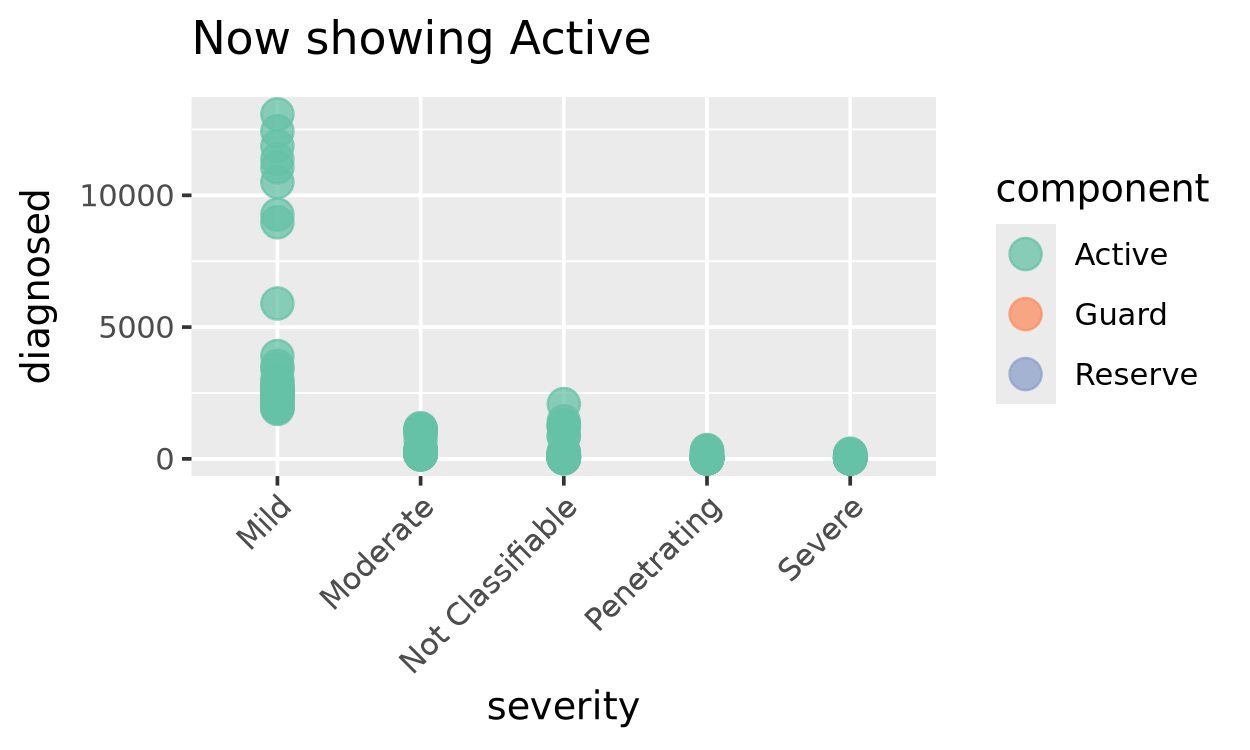

In [5]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)


# 결측치 제거
tbi_military_clean = tbi_military %>%
  filter(!is.na(severity), !is.na(diagnosed), !is.na(component))

# 애니메이션 생성
anim1 = ggplot(tbi_military_clean, aes(x = severity, y = diagnosed, colour = component)) +
  geom_point(size = 4, alpha = 0.75) +
  scale_color_brewer(palette = 'Set2') +
  ggtitle('Now showing {closest_state}') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # x축 텍스트 회전
  transition_states(component, transition_length = 2, state_length = 1) +
  enter_grow() +
  exit_shrink()

# 애니메이션 출력
display_gif(anim1, width = 5, height = 3, units = 'in', res = 250)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



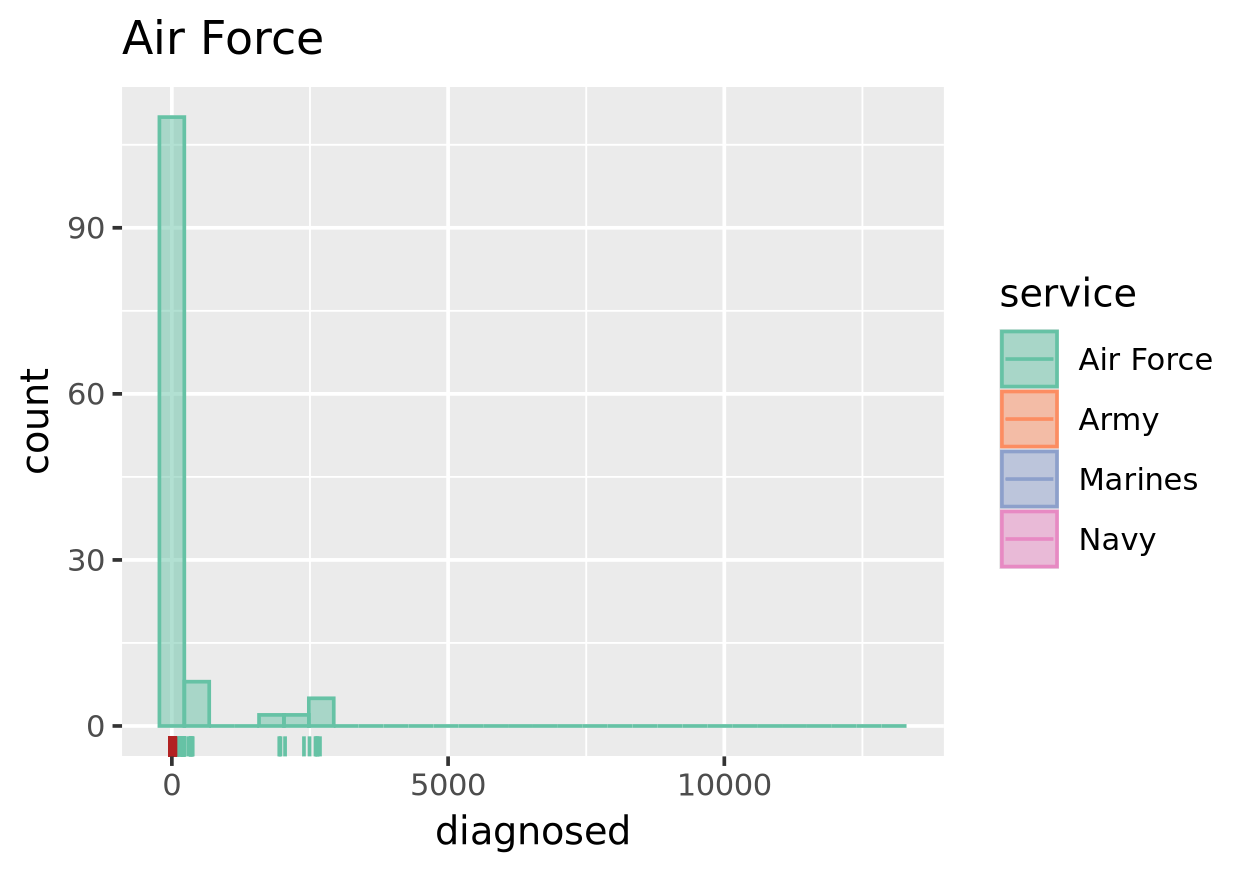

In [6]:
# 🏃🏽‍♀️ run me!

anim2 = ggplot(tbi_military_clean, aes(x = diagnosed, fill = service, color = service)) + 
    geom_histogram(position = 'identity', alpha = 0.5) +
    scale_color_brewer(palette = 'Set2') +
    scale_fill_brewer(palette = 'Set2') +
    geom_rug(mapping = aes(group = service)) +
    geom_rug(mapping = aes(group = service), data = tbi_military_clean |> filter(severity == c("Penetrating", "Severe")), color = 'firebrick', size = 1) +
    transition_states(service) +      # 🆕
    exit_shrink() + enter_grow() + # 🆕
    ggtitle('{closest_state}')     # 🆕

display_gif(anim2, width = 5, height = 3.5, units = 'in', res = 250)

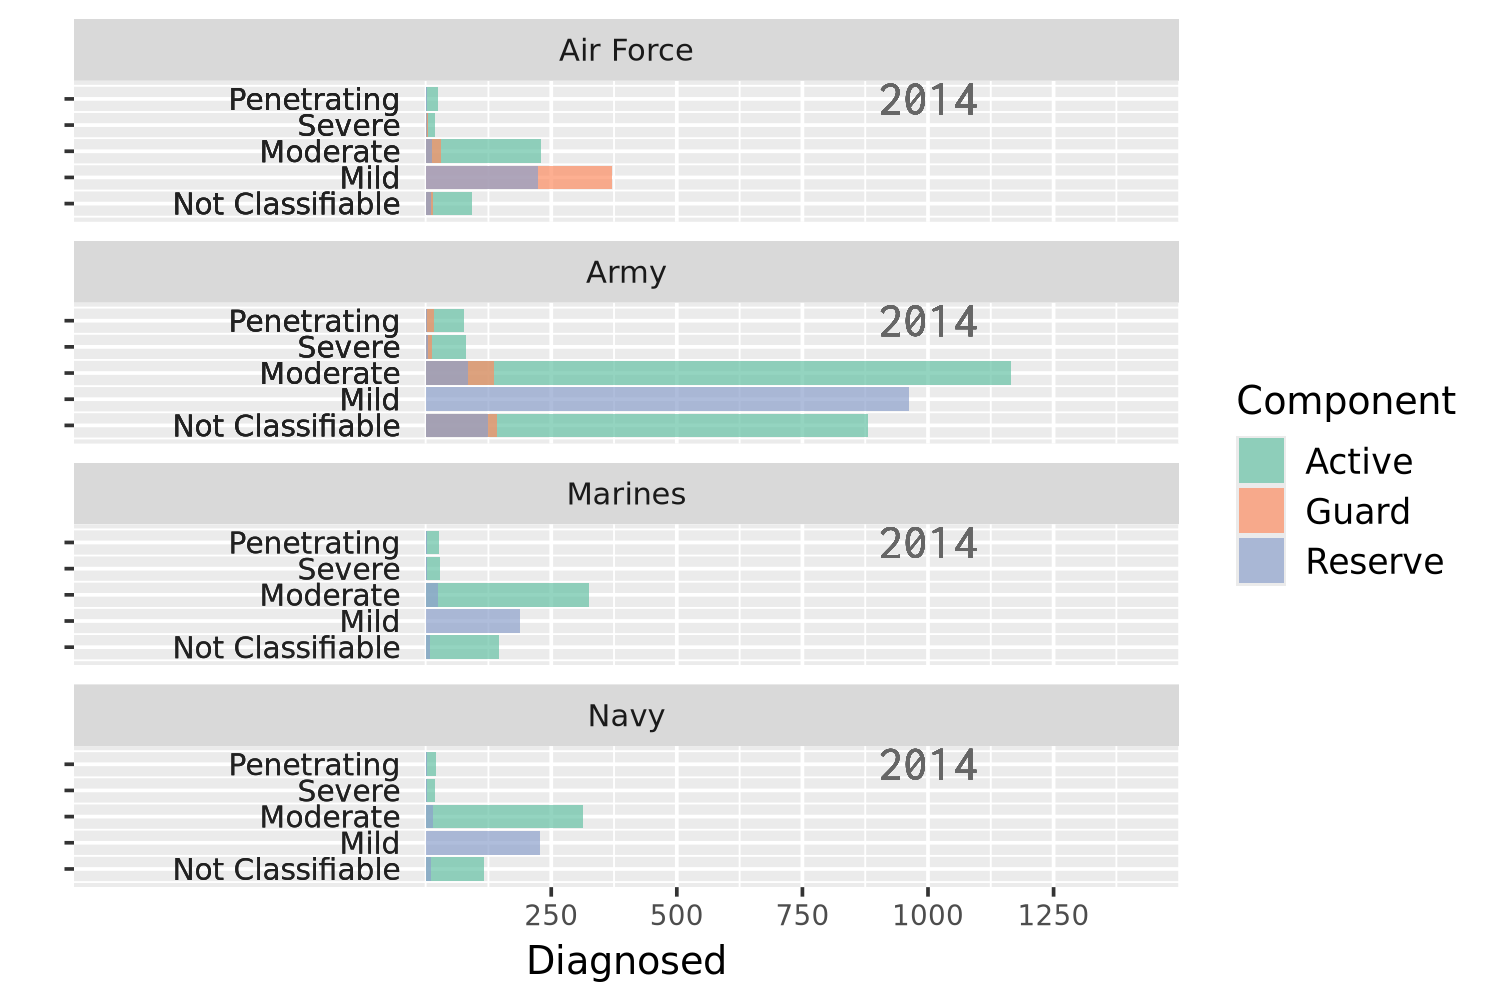

In [7]:
# 데이터 전처리
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0,       # diagnosed가 0 이상인지 확인
         year == 2014) %>%
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

# 애니메이션 생성
anim3 <- ggplot(tbi_military_clean2,  
              aes(xmin = 0,  
                  xmax = diagnosed,
                  ymin = as.numeric(severity) - 0.45,  
                  ymax = as.numeric(severity) + 0.45,
                  fill = component)) +  
    geom_rect(alpha = .7, na.rm = TRUE) +  
    geom_text(aes(x = -50, 
                  y = as.numeric(severity), 
                  label = severity),  # severity 이름 추가
              col = "gray13",  
              hjust = "right",  
              size = 3) + 
    geom_text(aes(x = 1000, 
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40") +
    scale_fill_brewer(palette = "Set2") +   
    scale_x_continuous(limits = c(-600, 1400), 
                       breaks = c(250, 500, 750, 1000, 1250)) +  
    labs(x = 'Diagnosed', y = '', fill = 'Component') +  
    # theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free_y") # Service별로 분리된 패널

# 결과 출력
anim3



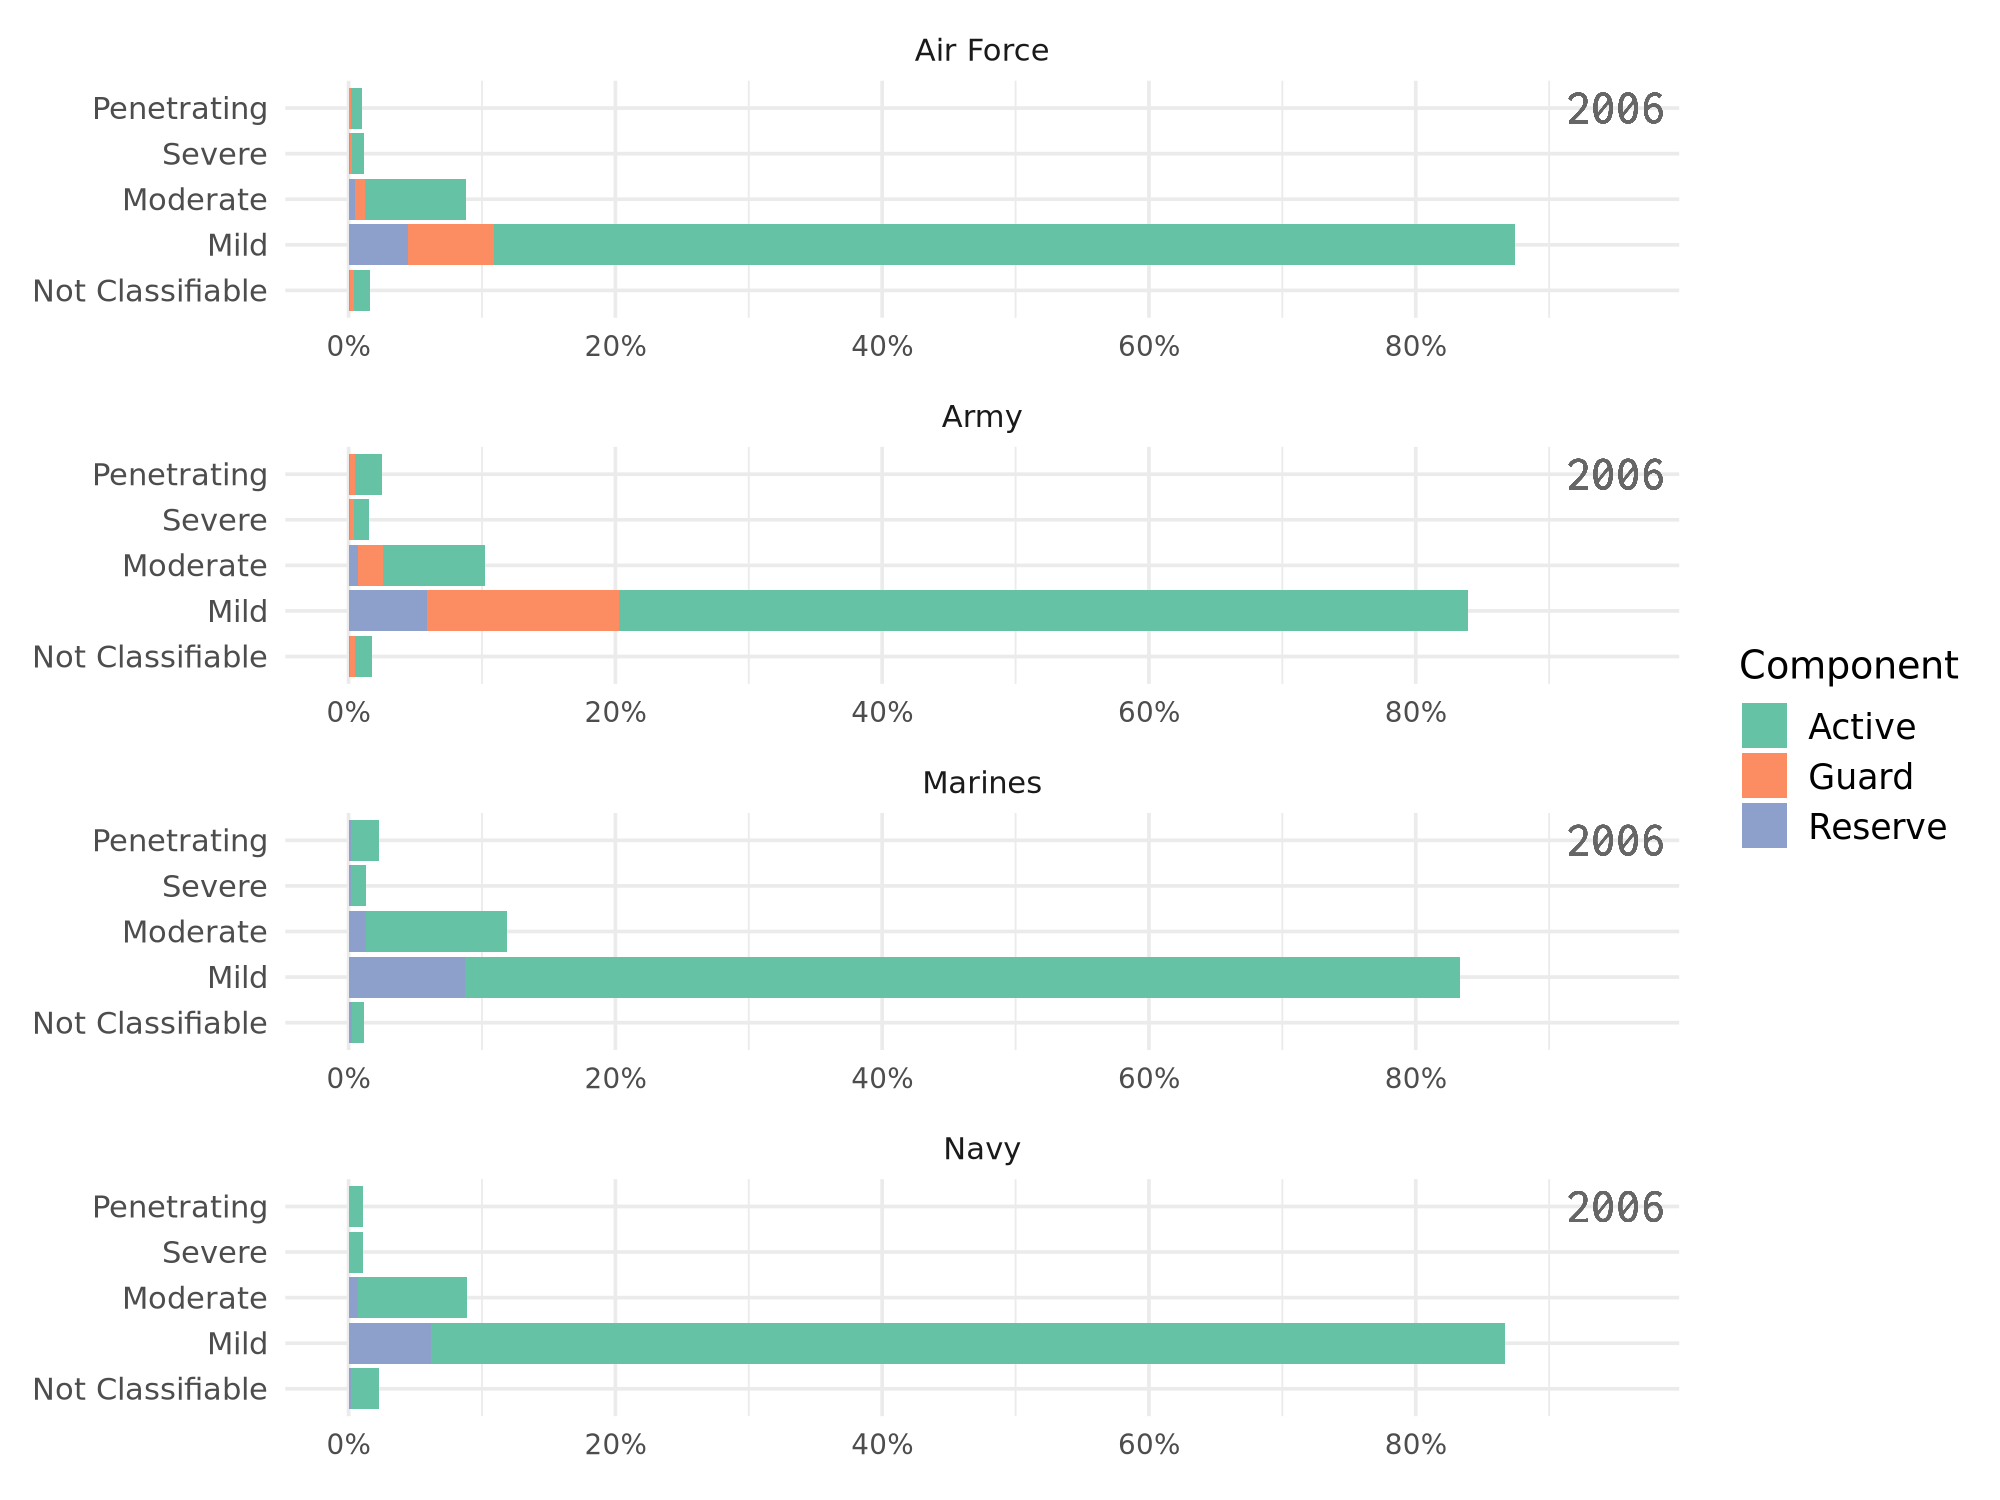

In [8]:
tbi_military_clean2 <- tbi_military %>%
  filter(!is.na(diagnosed), 
         !is.na(severity), 
         !is.na(component),
         !is.na(service), 
         !is.na(year), 
         diagnosed >= 0) %>%
  group_by(service, year) %>%
  mutate(total_diagnosed = sum(diagnosed, na.rm = TRUE),  # 총 diagnosed 계산
         rate = diagnosed / total_diagnosed * 100) %>%  # 비율 계산
  ungroup() %>%
  mutate(severity = factor(severity, levels = rev(unique(severity)))) # y축 순서 반전

anim4 = ggplot(tbi_military_clean2, aes(y = severity, x = rate, fill = component)) + 
    geom_col() +
    geom_text(data = tbi_military_clean2 %>% filter(!is.na(rate)),  # 결측값 제외
              aes(x = 95,  # x축 오른쪽에 연도 표시
                  y = 5, 
                  label = as.character(year)),
              family = "courier",  
              size = 5, col = "grey40", na.rm = TRUE) +
    scale_fill_brewer(palette = "Set2") +
    scale_x_continuous(breaks = seq(0, 100, by = 20),  # 적절한 눈금 생성
                       labels = scales::label_percent(scale = 1)) +
    labs(x = '', y = '', fill = 'Component') +  # 축 라벨은 직접 geom_text로 표시
    theme_minimal() +
    theme(legend.text = element_text(size = 10), 
          legend.key.size = unit(0.2, "in"),
          # axis.text.y = element_blank(),  
          axis.text.x = element_text(size = 8)) +
    facet_wrap(~service, ncol = 1, scales = "free") +
    transition_states(year, transition_length = 1, state_length = 1)
    
display_gif(anim4, height = 6, width = 8, units = 'in', res = 250, nframes = 200, fps = 20)


In [9]:
# 데이터 읽기
tbi_military <- read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-24/tbi_military.csv")

# diagnosed 열의 최솟값과 최댓값 계산
min_diagnosed <- min(tbi_military$diagnosed, na.rm = TRUE)
max_diagnosed <- max(tbi_military$diagnosed, na.rm = TRUE)

# 결과 출력
cat("diagnosed의 최솟값:", min_diagnosed, "\n")
cat("diagnosed의 최댓값:", max_diagnosed, "\n")

diagnosed의 최솟값: 1 
diagnosed의 최댓값: 13074 


In [10]:
str(tbi_military_clean)

spc_tbl_ [438 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ service  : chr [1:438] "Army" "Army" "Army" "Army" ...
 $ component: chr [1:438] "Active" "Active" "Active" "Active" ...
 $ severity : chr [1:438] "Penetrating" "Severe" "Moderate" "Mild" ...
 $ diagnosed: num [1:438] 189 102 709 5896 122 ...
 $ year     : num [1:438] 2006 2006 2006 2006 2006 ...
 - attr(*, "spec")=
  .. cols(
  ..   service = col_character(),
  ..   component = col_character(),
  ..   severity = col_character(),
  ..   diagnosed = col_double(),
  ..   year = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


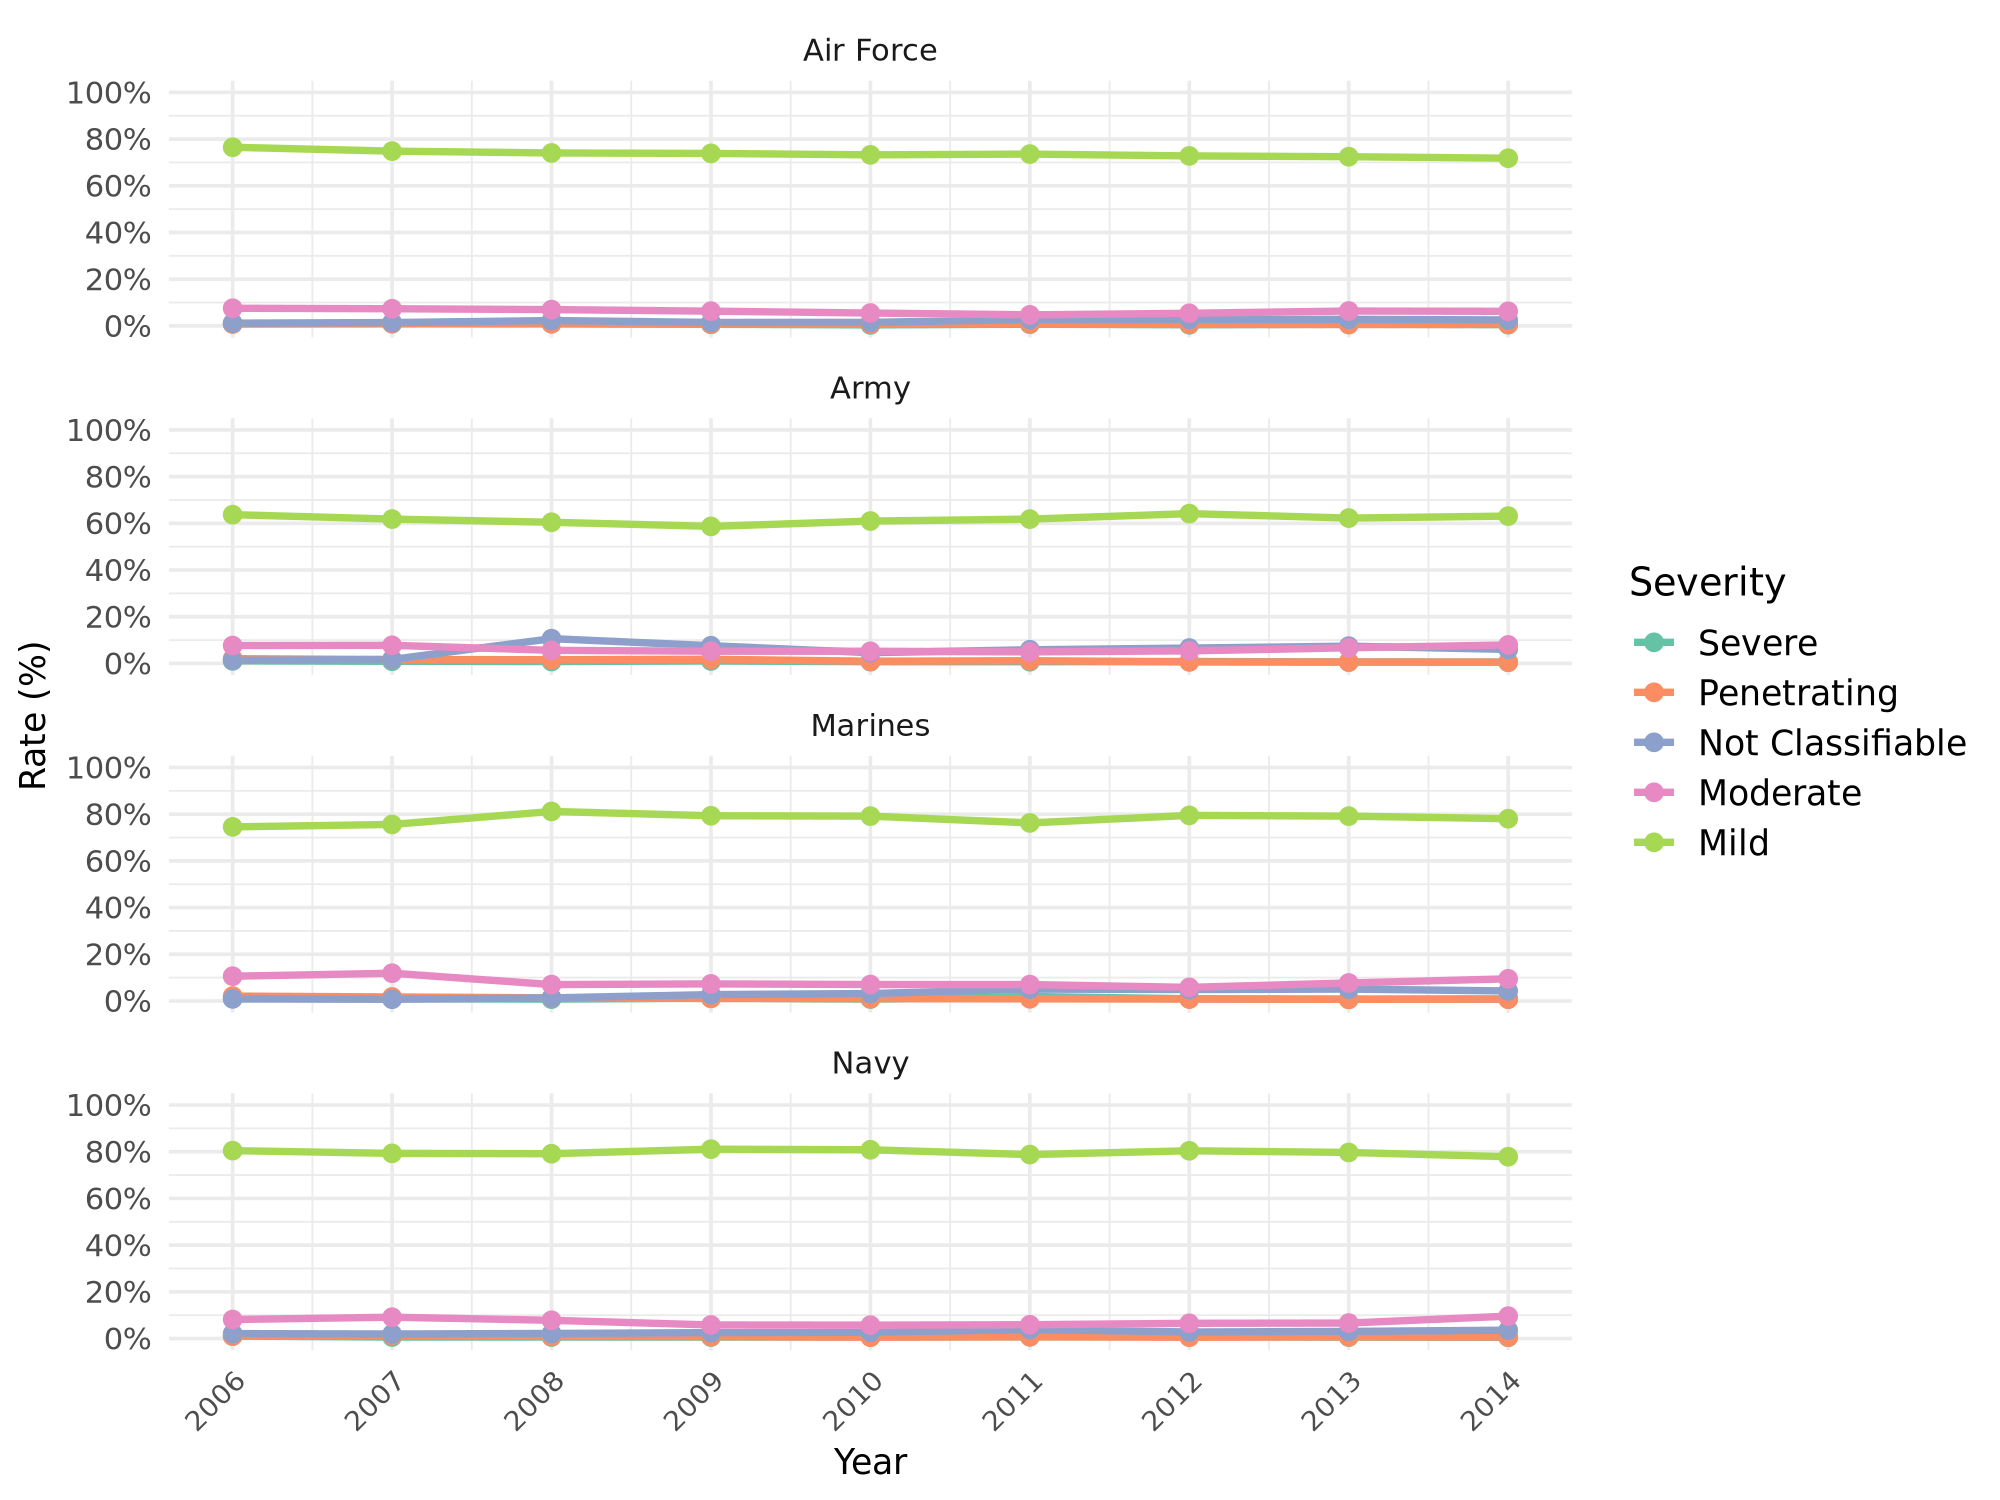

In [21]:
options(repr.plot.res = 250, repr.plot.height = 6, repr.plot.width = 8)

# 최대 값 선택
tbi_military_max_rate <- tbi_military_clean2 %>%
  group_by(service, severity, year) %>% # group by service, severity, and year
  summarize(max_rate = max(rate, na.rm = TRUE), .groups = "drop") %>% # 최대값 계산
  ungroup()

# 그래프 생성
ggplot(tbi_military_max_rate, aes(x = year, y = max_rate, color = severity, group = severity)) +
  geom_line(size = 1) +  # 선 그래프
  geom_point(size = 2) +  # 데이터 점 추가
  scale_color_brewer(palette = "Set2") +  # 색상 팔레트 설정
  scale_x_continuous(breaks = seq(min(tbi_military_clean2$year), max(tbi_military_clean2$year), by = 1)) +
  scale_y_continuous(
    breaks = seq(0, 100, by = 20),  # y축 눈금 설정
    limits = c(0, 100),  # y축 범위를 0에서 100으로 고정
    labels = scales::label_percent(scale = 1)
  ) +
  labs(
    x = "Year", 
    y = "Rate (%)", 
    color = "Severity"
  ) +
  theme_minimal() +
  theme(
    legend.text = element_text(size = 10), 
    legend.key.size = unit(0.2, "in"),
    axis.text.x = element_text(size = 8, angle = 45, hjust = 1),
    axis.title = element_text(size = 10)
  ) +
  facet_wrap(~service, ncol = 1, scales = "fixed")  # service별로 구분된 그래프

